In [2]:
from time import time
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesClassifier

In [33]:
n_jobs = 8

# changing 3d to 2D
data = fetch_olivetti_faces();
print data.images.shape
print len(data.images)
X = data.images.reshape((len(data.images),-1)) # now each z axis is going to be a new column in y 
print X.shape # 4096 features
y = data.target
#import numpy as np
#np.reshape?

(400, 64, 64)
400
(400, 4096)


In [34]:
mask = y < 5 # remove lower intesity pixels
X = X[mask]
y = y[mask]

t0 = time()

forest = ExtraTreesClassifier(n_estimators=1000,
                             max_features=128, # rule of thumb in classification max_features= sqrt(features) = 64 
                                               # reduces variance but increases bias
                             n_jobs=n_jobs,
                             random_state=0)

forest.fit(X,y)
print "done in %0.3fs"% (time()-t0)

done in 1.913s


In [31]:
importance = forest.feature_importances_
print importance
print len(importance) # importance on scale 0 to 1 for each of 4096 features
print data.images[0].shape # old shape of features in y and z dimensions
importance = importance.reshape(data.images[0].shape)
print importance

[  6.25000000e-05   0.00000000e+00   1.91186869e-04 ...,   4.16666667e-05
   5.98121218e-04   8.40352084e-04]
4096
(64, 64)
[[  6.25000000e-05   0.00000000e+00   1.91186869e-04 ...,   1.65238095e-04
    4.50000000e-05   1.07500000e-04]
 [  0.00000000e+00   1.97916667e-04   4.54545455e-05 ...,   0.00000000e+00
    4.50000000e-05   1.85606061e-04]
 [  3.75000000e-05   6.11154124e-04   4.54545455e-05 ...,   0.00000000e+00
    1.80357143e-04   1.04866987e-03]
 ..., 
 [  1.15454545e-04   3.33333333e-05   4.37500000e-05 ...,   7.39571441e-04
    8.85274390e-04   1.30852787e-03]
 [  2.25454545e-04   1.60378788e-04   1.60000000e-04 ...,   5.51965078e-04
    3.79512195e-04   1.52398990e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   4.16666667e-05
    5.98121218e-04   8.40352084e-04]]


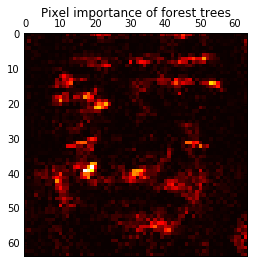

In [32]:
plt.matshow(importance, cmap= plt.cm.hot)
plt.title("Pixel importance of forest trees")
plt.show()